In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

df = pd.read_csv('economics.csv')
df

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575


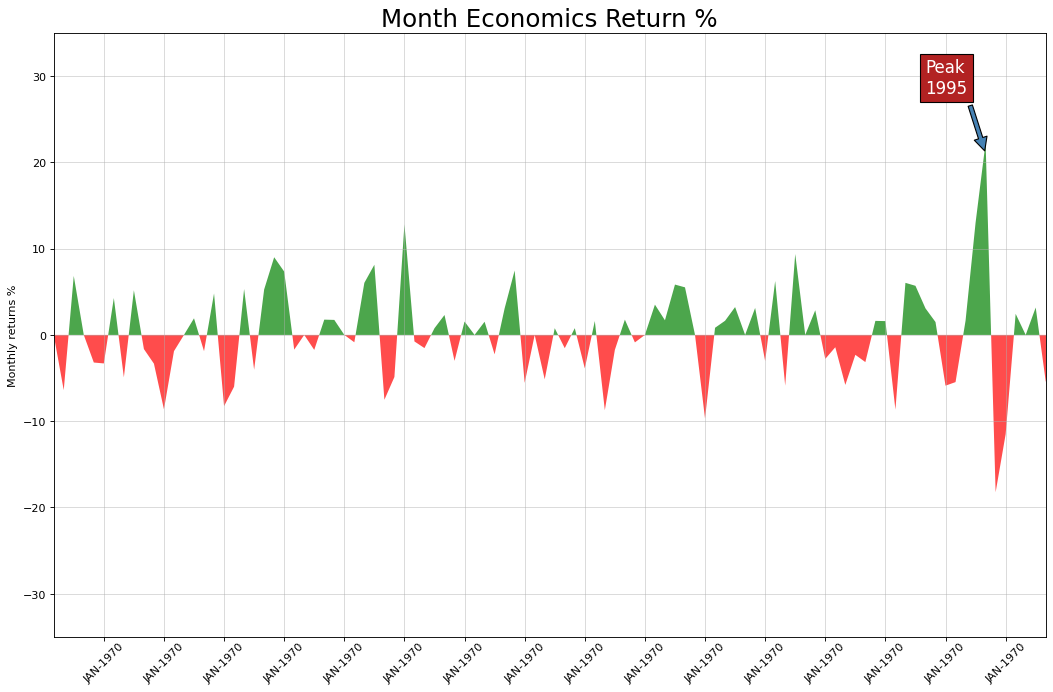

In [69]:
#plot 
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100
y_returns
plt.figure(figsize=(16,10), dpi=80)
plt.fill_between(x[1:], y_returns[1:], 0, where= y_returns[1:] >=0, facecolor='green',interpolate=True, alpha=0.7)
plt.fill_between(x[1:],y_returns[1:],0, where = y_returns[1:] <=0, facecolor='red', interpolate=True, alpha=0.7)

#Annotate
plt.annotate('Peak\n1995', xy=(94.0, 21.0), 
             xytext=(88.0, 28), 
             bbox=dict(boxstyle='square', facecolor='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05),
             fontsize=15,
             color='white'
            )


#Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y, m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=45, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

